<a href="https://colab.research.google.com/github/felixomomah/Stock_Market_Trend_Analysis/blob/main/First_work_on_Stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

STOCK MARKET TREND ANALYSIS

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
sns.set_style("whitegrid")
from plotly.subplots import make_subplots
import warnings

warnings.filterwarnings("ignore")

In [ ]:
yf.__version__

'0.2.52'

Srcaping Stock Price data
NVDA (Nvidia),
QUBT (Quantum Computing),
S&P 500 (^GSPS)

In [ ]:
# Define stock tickers and data range
tickers = ["NVDA","QUBT","^GSPC"]
start_date = "2010-03-02"
end_date = "2024-02-28"

# Fetch data
stock_data = {}
for ticker in tickers:
    stock_data[ticker] = yf.download(ticker, start=start_date, end=end_date)
    print(f"Downloaded data for {ticker}")

# Save individual CSVs (optional)
for ticker, data in stock_data.items():
    data.to_csv(f"{ticker}_stock_data.csv")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Downloaded data for NVDA
Downloaded data for QUBT


[*********************100%***********************]  1 of 1 completed


Downloaded data for ^GSPC


In [ ]:
#Fetch data for NVDA
nvda_data = stock_data["NVDA"]
nvda_data =nvda_data.xs("NVDA", axis=1,level="Ticker")
nvda_data.head()

Price,Close,High,Low,Open,Volume
Date,,,,,
2010-03-02,0.386093,0.394576,0.383342,0.389761,538648000
2010-03-03,0.381278,0.390449,0.378068,0.388386,399300000
2010-03-04,0.381966,0.385864,0.377151,0.382883,557396000
2010-03-05,0.393659,0.396410,0.379215,0.379215,632832000
2010-03-08,0.387927,0.395034,0.386322,0.393888,439312000


In [ ]:
#Fetch data for QUBT
qubt_data = stock_data["QUBT"]
qubt_data =qubt_data.xs("QUBT", axis=1,level="Ticker")
qubt_data.head()

Price,Close,High,Low,Open,Volume
Date,,,,,
2010-03-02,134.0,134.0,130.0,130.0,105
2010-03-03,138.0,150.0,132.0,132.0,106
2010-03-04,130.0,144.0,130.0,144.0,180
2010-03-05,160.0,160.0,129.0,130.0,242
2010-03-08,160.0,164.0,14.4,14.4,51


In [ ]:
#Fetch data for GSPC
gspc_data = stock_data["^GSPC"]
gspc_data =gspc_data.xs("^GSPC", axis=1,level="Ticker")
gspc_data.head()

Price,Close,High,Low,Open,Volume
Date,,,,,
2010-03-02,1118.310059,1123.459961,1116.510010,1117.010010,4134680000
2010-03-03,1118.790039,1125.640015,1116.579956,1119.359985,3951320000
2010-03-04,1122.969971,1123.729980,1116.660034,1119.119995,3945010000
2010-03-05,1138.699951,1139.380005,1125.119995,1125.119995,4133000000
2010-03-08,1138.500000,1141.050049,1136.770020,1138.400024,3774680000


Feature Engineering:

1 Computing the stock "Returns" feature

2 Create a "Tomorrow" column

3 Create a "STock Direction" column

In [ ]:
# NVDA Stock Returns
nvda_data["Returns"] = nvda_data["Close"].pct_change()

# NVDA Tomorrow column
nvda_data["Tomorrow"] = nvda_data["Close"].shift(-1)

# Stock Direction
nvda_data["Stock Direction"] = (nvda_data['Close'] > nvda_data["Close"].shift(1)).astype(int)
nvda_data.head()

Price,Close,High,Low,Open,Volume,Returns,Tomorrow,Stock Direction
Date,,,,,,,,
2010-03-02,0.386093,0.394576,0.383342,0.389761,538648000,NaN,0.381278,0
2010-03-03,0.381278,0.390449,0.378068,0.388386,399300000,-0.012470,0.381966,0
2010-03-04,0.381966,0.385864,0.377151,0.382883,557396000,0.001804,0.393659,1
2010-03-05,0.393659,0.396410,0.379215,0.379215,632832000,0.030612,0.387927,1
2010-03-08,0.387927,0.395034,0.386322,0.393888,439312000,-0.014560,0.402371,0


In [ ]:
nvda_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3522 entries, 2010-03-02 to 2024-02-27
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Close            3522 non-null   float64
 1   High             3522 non-null   float64
 2   Low              3522 non-null   float64
 3   Open             3522 non-null   float64
 4   Volume           3522 non-null   int64  
 5   Returns          3521 non-null   float64
 6   Tomorrow         3521 non-null   float64
 7   Stock Direction  3522 non-null   int64  
dtypes: float64(6), int64(2)
memory usage: 247.6 KB


In [ ]:
nvda_data.isna().sum()

,0
Price,
Close,0
High,0
Low,0
Open,0
Volume,0
Returns,1
Tomorrow,1
Stock Direction,0


In [ ]:
nvda_data.duplicated().sum()

0

In [ ]:
# QUBT Stock Returns
qubt_data["Returns"] = qubt_data["Close"].pct_change()

# QUBT Tomorrow column
qubt_data["Tomorrow"] = qubt_data["Close"].shift(-1)

# Stock Direction
qubt_data["Stock Direction"] = (qubt_data['Close'] > qubt_data["Close"].shift(1)).astype(int)
qubt_data.head()

Price,Close,High,Low,Open,Volume,Returns,Tomorrow,Stock Direction
Date,,,,,,,,
2010-03-02,134.0,134.0,130.0,130.0,105,NaN,138.0,0
2010-03-03,138.0,150.0,132.0,132.0,106,0.029851,130.0,1
2010-03-04,130.0,144.0,130.0,144.0,180,-0.057971,160.0,0
2010-03-05,160.0,160.0,129.0,130.0,242,0.230769,160.0,1
2010-03-08,160.0,164.0,14.4,14.4,51,0.000000,142.0,0


In [ ]:
qubt_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3522 entries, 2010-03-02 to 2024-02-27
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Close            3522 non-null   float64
 1   High             3522 non-null   float64
 2   Low              3522 non-null   float64
 3   Open             3522 non-null   float64
 4   Volume           3522 non-null   int64  
 5   Returns          3521 non-null   float64
 6   Tomorrow         3521 non-null   float64
 7   Stock Direction  3522 non-null   int64  
dtypes: float64(6), int64(2)
memory usage: 247.6 KB


In [ ]:
qubt_data.isna().sum()

,0
Price,
Close,0
High,0
Low,0
Open,0
Volume,0
Returns,1
Tomorrow,1
Stock Direction,0


In [ ]:
qubt_data.describe()

Price,Close,High,Low,Open,Volume,Returns,Tomorrow,Stock Direction
count,3522.000000,3522.000000,3522.000000,3522.000000,3.522000e+03,3521.000000,3521.000000,3522.000000
mean,4.921393,5.323137,4.501087,4.941456,1.413755e+05,0.020552,4.884734,0.217490
std,12.869840,14.144796,11.341460,12.977548,9.448241e+05,0.408025,12.686417,0.412597
min,0.015000,0.015000,0.015000,0.015000,0.000000e+00,-0.995000,0.015000,0.000000
25%,0.600000,0.600000,0.600000,0.600000,0.000000e+00,-0.007634,0.600000,0.000000
50%,2.590000,2.642000,2.400000,2.590000,5.600000e+01,0.000000,2.590000,0.000000
75%,5.150000,5.500000,5.000000,5.100000,3.687500e+04,0.000000,5.150000,0.000000
max,160.000000,164.000000,150.000000,164.000000,3.033620e+07,20.333333,160.000000,1.000000


In [ ]:
qubt_data.duplicated().sum()

1174

In [ ]:
# ^GSPC Stock Returns
gspc_data["Returns"] = gspc_data["Close"].pct_change()

# NVDA Tomorrow column
gspc_data["Tomorrow"] = gspc_data["Close"].shift(-1)

# Stock Direction
gspc_data["Stock Direction"] = (gspc_data['Close'] > gspc_data["Close"].shift(1)).astype(int)
gspc_data.head()

Price,Close,High,Low,Open,Volume,Returns,Tomorrow,Stock Direction
Date,,,,,,,,
2010-03-02,1118.310059,1123.459961,1116.510010,1117.010010,4134680000,NaN,1118.790039,0
2010-03-03,1118.790039,1125.640015,1116.579956,1119.359985,3951320000,0.000429,1122.969971,1
2010-03-04,1122.969971,1123.729980,1116.660034,1119.119995,3945010000,0.003736,1138.699951,1
2010-03-05,1138.699951,1139.380005,1125.119995,1125.119995,4133000000,0.014007,1138.500000,1
2010-03-08,1138.500000,1141.050049,1136.770020,1138.400024,3774680000,-0.000176,1140.449951,0


In [ ]:
gspc_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3522 entries, 2010-03-02 to 2024-02-27
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Close            3522 non-null   float64
 1   High             3522 non-null   float64
 2   Low              3522 non-null   float64
 3   Open             3522 non-null   float64
 4   Volume           3522 non-null   int64  
 5   Returns          3521 non-null   float64
 6   Tomorrow         3521 non-null   float64
 7   Stock Direction  3522 non-null   int64  
dtypes: float64(6), int64(2)
memory usage: 247.6 KB


Exploratory Data and Stock Market Analysis:

Statistical Analysis

Stock Correlation

Correlation Metrics:
           NVDA      QUBT     ^GSPC
NVDA   1.000000 -0.091423  0.836742
QUBT  -0.091423  1.000000 -0.170322
^GSPC  0.836742 -0.170322  1.000000


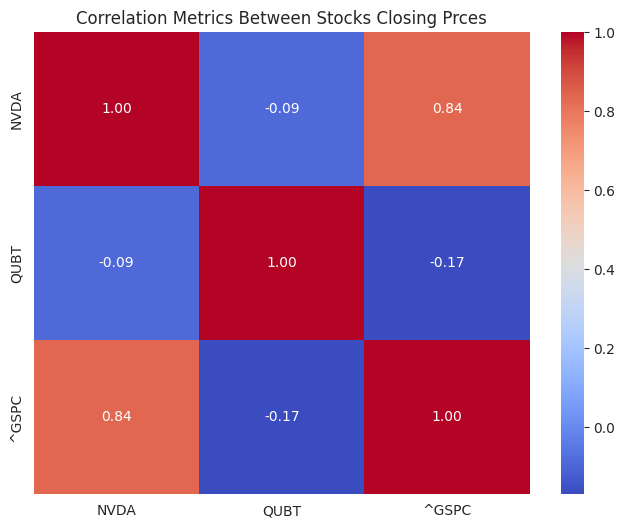

In [ ]:
# Create a DataFrame with Closing prices of all stocks
closing_prices_df = pd.DataFrame({"NVDA": nvda_data['Close'],
                                  "QUBT": qubt_data['Close'],
                                  "^GSPC": gspc_data['Close']
})

#Calculate the correlation metrics
correlation_metrics = closing_prices_df.corr()

#Display the correlation metrics
print("Correlation Metrics:")
print(correlation_metrics)

# Visualise the correlation metric with a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_metrics, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Metrics Between Stocks Closing Prces")
plt.show()

In [ ]:
# Calculate moving averages (such as, 20-days and 50-days)
nvda_data['20_days_MA'] = nvda_data['Close'].rolling(window=20).mean()
nvda_data['50_days_MA'] = nvda_data['Close'].rolling(window=50).mean()

qubt_data['20_days_MA'] = qubt_data['Close'].rolling(window=20).mean()
qubt_data['50_days_MA'] = qubt_data['Close'].rolling(window=50).mean()

gspc_data['20_days_MA'] = gspc_data['Close'].rolling(window=20).mean()
gspc_data['50_days_MA'] = gspc_data['Close'].rolling(window=50).mean()

# Create subplots
fig = make_subplots(rows=3, cols=1, shared_xaxes=True, subplot_titles=("NVDA", "QUBT", "^GSPC"))

# Add traces for each stock
fig.add_trace(go.Scatter(x=nvda_data.index, y=nvda_data['Close'], name='NVDA Close'), row=1, col=1)
fig.add_trace(go.Scatter(x=nvda_data.index, y=nvda_data['20_days_MA'], name='20-days MA'), row=1, col=1)
fig.add_trace(go.Scatter(x=nvda_data.index, y=nvda_data["50_days_MA"], name="50-days MA"), row=1, col=1)

fig.add_trace(go.Scatter(x=qubt_data.index, y=qubt_data['Close'], name='QUBT Close'), row=2, col=1)
fig.add_trace(go.Scatter(x=qubt_data.index, y=qubt_data['20_days_MA'], name='20-days MA'), row=2, col=1)
fig.add_trace(go.Scatter(x=qubt_data.index, y=qubt_data["50_days_MA"], name="50-days MA"), row=2, col=1)

fig.add_trace(go.Scatter(x=gspc_data.index, y=gspc_data['Close'], name= 'GSPC Close'), row=3, col=1)
fig.add_trace(go.Scatter(x=gspc_data.index, y=gspc_data['20_days_MA'], name='20-days MA'), row=3, col=1)
fig.add_trace(go.Scatter(x=gspc_data.index, y=gspc_data["50_days_MA"], name="50-days MA"), row=3, col=1)

# Update Layout
fig.update_layout(height=1000, title_text="Moving Averages NVDA, QUBT, GSPC")

#show the plot
fig.show()

In [37]:
#Create a list to store the results
results = []

#Function to perform analysis and append results to the list
def analyze_ma(data, ma, stock_name):
    mean = ma.mean()
    std_dev = ma.std()
    corr = data['Close'].corr(ma)
    results.append([stock_name, ma.name, mean, std_dev, corr])

# Perform analysis and append results
analyze_ma(nvda_data, nvda_data['20_days_MA'], 'NVDA')
analyze_ma(nvda_data, nvda_data['50_days_MA'], 'NVDA')
analyze_ma(qubt_data, qubt_data['20_days_MA'], 'QUBT')
analyze_ma(qubt_data, qubt_data['50_days_MA'], 'QUBT')
analyze_ma(gspc_data, gspc_data['20_days_MA'], 'GSPC')
analyze_ma(gspc_data, gspc_data['50_days_MA'], 'GSPC')

#Create a pandas DataFrame from the results
results_df = pd.DataFrame(results, columns=['Stock', 'Moving Average', 'Mean', 'Std Dev', 'Corr'])

#Display the table
print(results_df)


  Stock Moving Average         Mean      Std Dev      Corr
0  NVDA     20_days_MA     7.806176    11.901216  0.995912
1  NVDA     50_days_MA     7.607570    11.355914  0.988805
2  QUBT     20_days_MA     4.552984    10.375015  0.972600
3  QUBT     50_days_MA     4.143744     7.462820  0.867046
4  GSPC     20_days_MA  2574.316910  1079.540391  0.997908
5  GSPC     50_days_MA  2570.417968  1067.870696  0.995095


In [38]:
# NVDA
nvda_average_daily_return = nvda_data['Returns'].mean()
nvda_std_dev_daily_return = nvda_data['Returns'].std()
nvda_correaltion_volume_returns = nvda_data[['Volume','Returns']].corr().loc['Volume', 'Returns']

# QUBT
qubt_average_daily_return = qubt_data['Returns'].mean()
qubt_std_dev_daily_return = qubt_data['Returns'].std()
qubt_correaltion_volume_returns = qubt_data[['Volume','Returns']].corr().loc['Volume', 'Returns']

# GSPC
gspc_data_average_daily_return = gspc_data['Returns'].mean()
gspc_data_std_dev_daily_return = gspc_data['Returns'].std()
gspc_data_correaltion_volume_returns = gspc_data[['Volume','Returns']].corr().loc['Volume', 'Returns']

# Create Metrics DataFrame
metrics_df = pd.DataFrame({
    'Stock': ['NVDA', 'QUBT', 'GSPC'],
    'Average Daily Return': [nvda_average_daily_return, qubt_average_daily_return, gspc_data_average_daily_return],
    'Std Dev Daily Return': [nvda_std_dev_daily_return, qubt_std_dev_daily_return, gspc_data_std_dev_daily_return],
    'Correlation Volume/Returns': [nvda_correaltion_volume_returns, qubt_correaltion_volume_returns, gspc_data_correaltion_volume_returns]
})
print(metrics_df)

  Stock  Average Daily Return  Std Dev Daily Return  \
0  NVDA              0.001909              0.028360   
1  QUBT              0.020552              0.408025   
2  GSPC              0.000491              0.011007   

   Correlation Volume/Returns  
0                    0.056087  
1                   -0.000262  
2                   -0.080129  


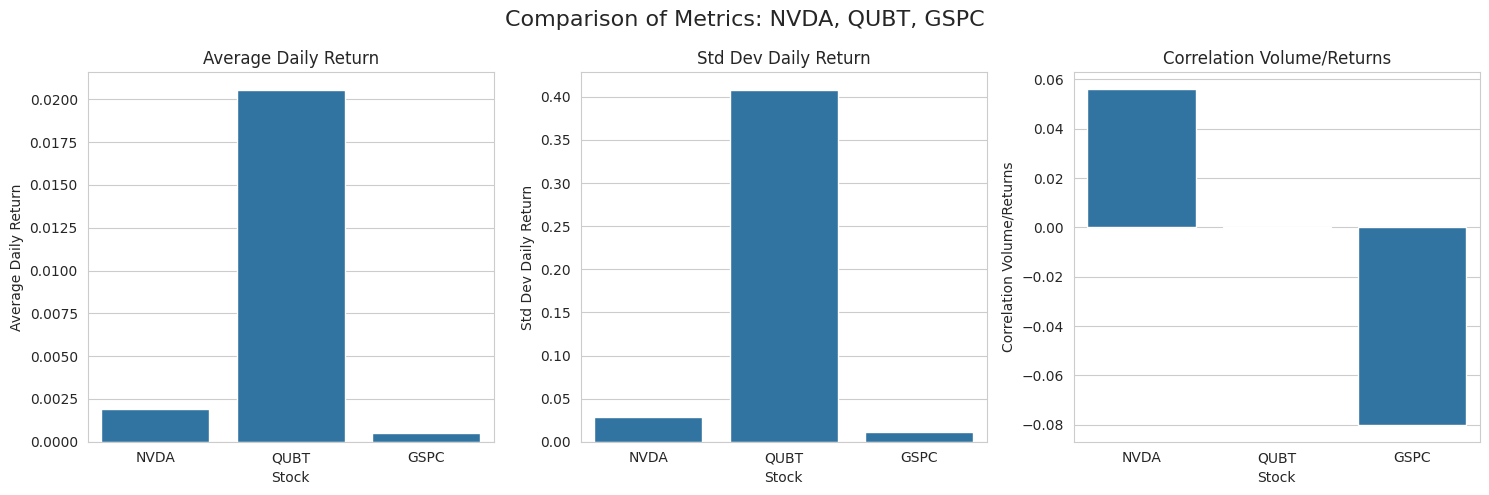

In [41]:
# Create plots for comparison
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Comparison of Metrics: NVDA, QUBT, GSPC', fontsize=16)

# 1. Average Daily Return
sns.barplot(x='Stock', y='Average Daily Return', data=metrics_df, ax=axes[0])
axes[0].set_title('Average Daily Return')

# 2. Std Dev Daily Return
sns.barplot(x='Stock', y='Std Dev Daily Return', data=metrics_df, ax=axes[1])
axes[1].set_title('Std Dev Daily Return')

# 3. Correlation Volume/Returns
sns.barplot(x='Stock', y='Correlation Volume/Returns', data=metrics_df, ax=axes[2])
axes[2].set_title('Correlation Volume/Returns')

plt.tight_layout()
plt.show()

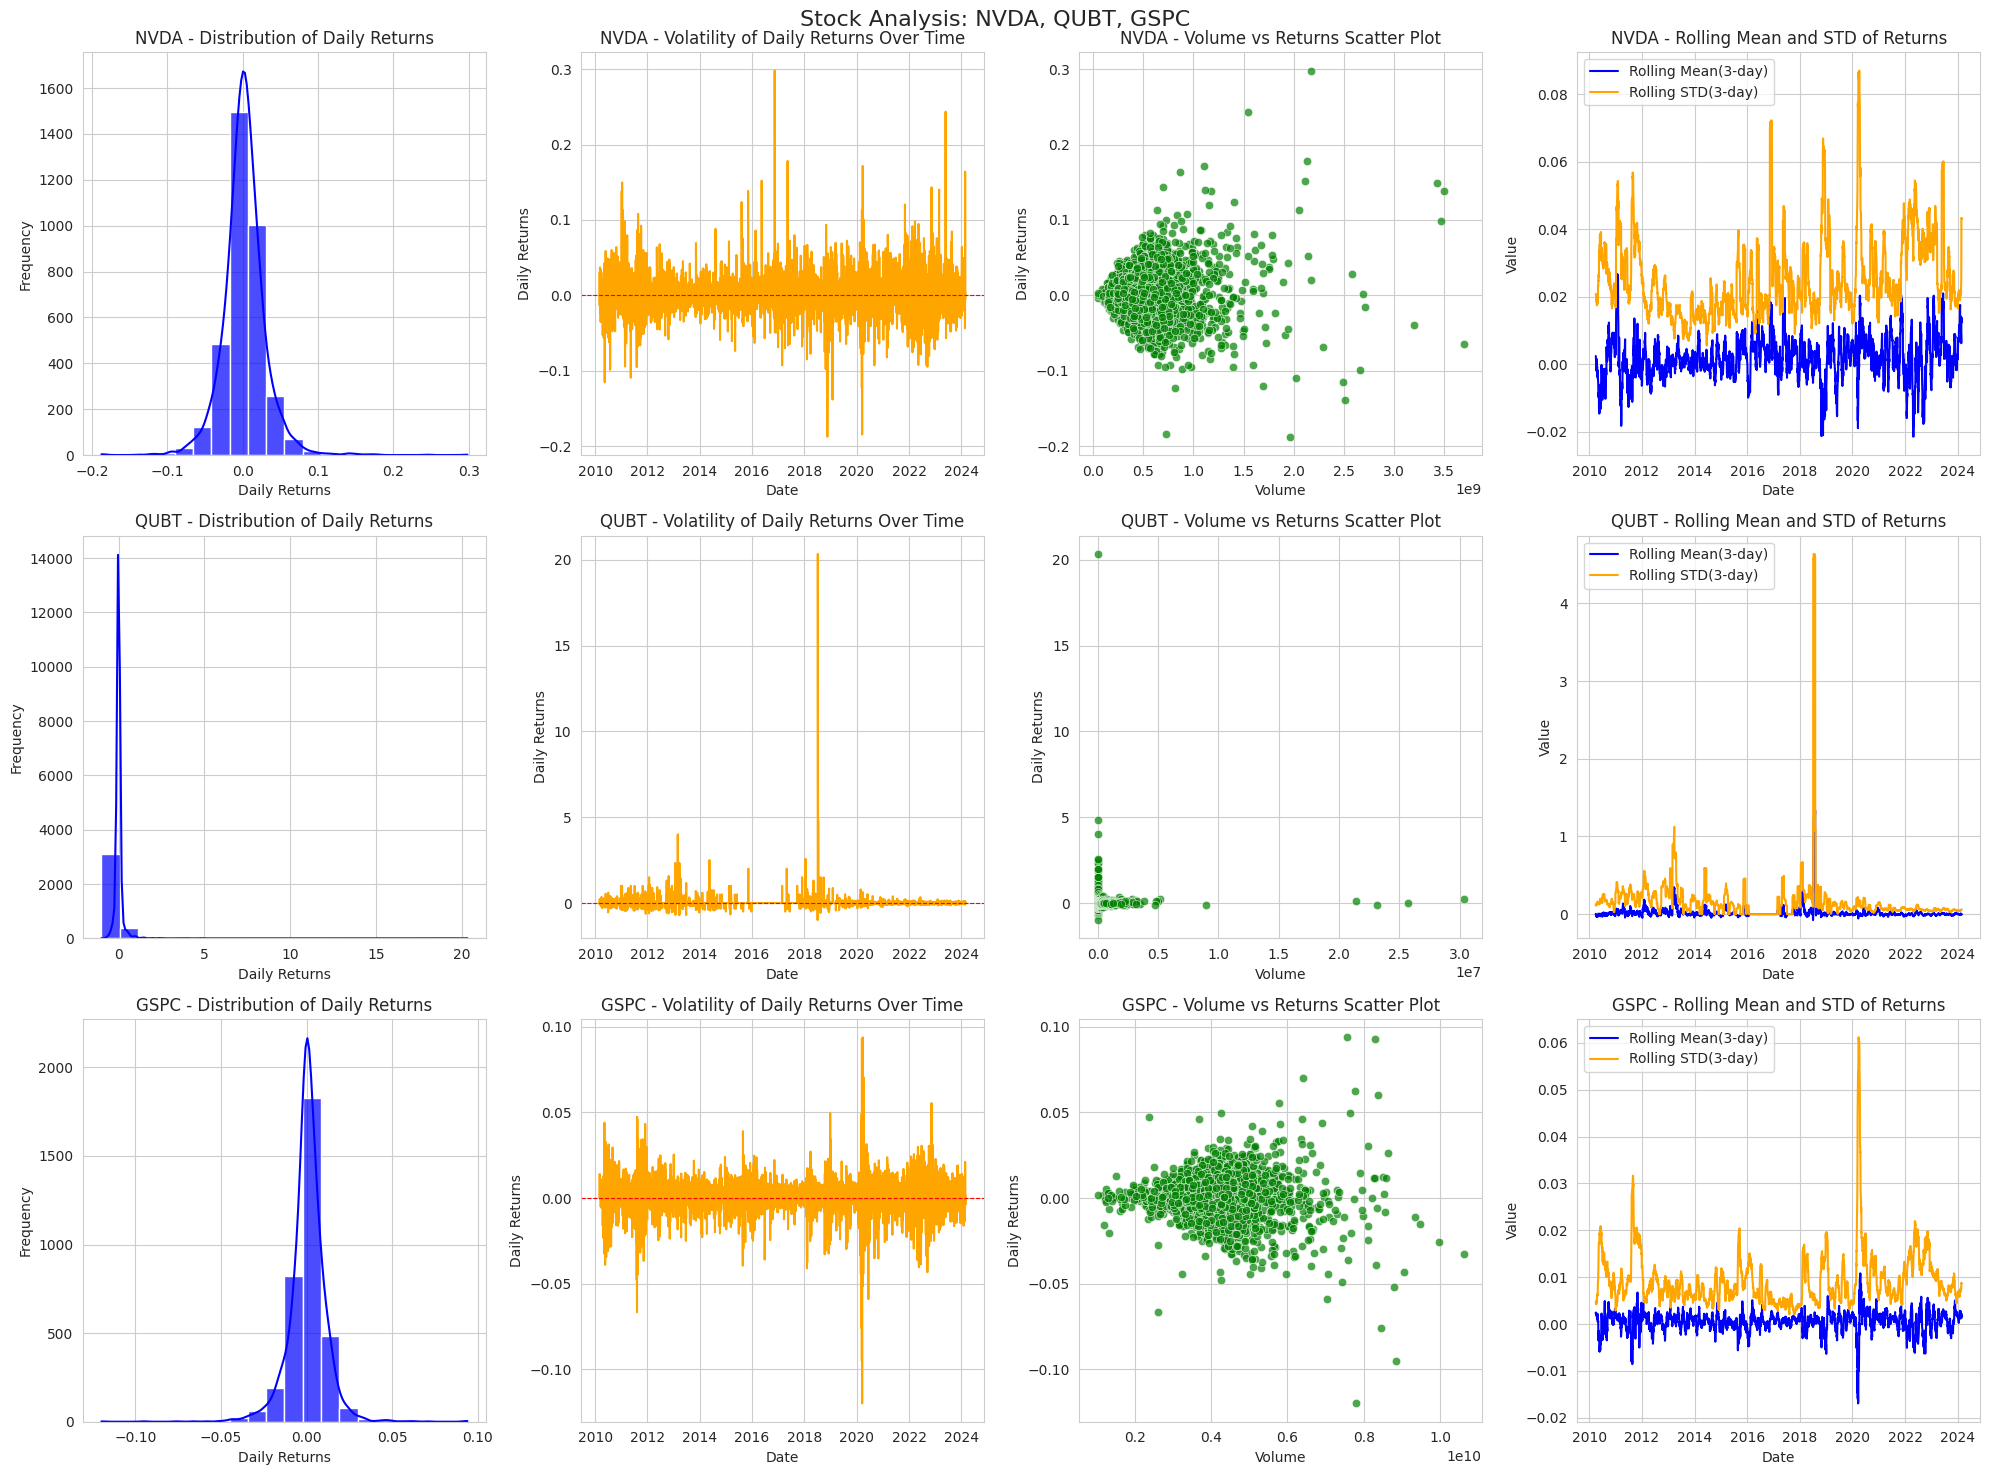

In [45]:
# Create subplots for each stock
fig, axes = plt.subplots(3, 4, figsize=(20, 15))
fig.suptitle('Stock Analysis: NVDA, QUBT, GSPC', fontsize=16)

# Data for each stock
stock_data_list = [(nvda_data, 'NVDA'), (qubt_data, 'QUBT'), (gspc_data, 'GSPC')]

for i, (stock_data, stock_name) in enumerate(stock_data_list):
    # 1.Distribution of Daily Returns
    sns.histplot(stock_data['Returns'], kde=True, bins=20, color='blue', alpha=0.7, ax=axes[i, 0])
    axes[i, 0].set_title(f'{stock_name} - Distribution of Daily Returns')
    axes[i, 0].set_xlabel('Daily Returns')
    axes[i, 0].set_ylabel('Frequency')

    # 2. Volatility Over Time
    axes[i, 1].plot(stock_data['Returns'], color ='orange')
    axes[i, 1].set_title(f'{stock_name} - Volatility of Daily Returns Over Time')
    axes[i, 1].axhline(y=0, color='red', linestyle='--', linewidth=0.8)
    axes[i, 1].set_ylabel('Daily Returns')
    axes[i, 1].set_xlabel('Date')

    # 3. Volume vs Return Scatter Plot
    sns.scatterplot(x=stock_data['Volume'].values.ravel(), y=stock_data['Returns'].values.ravel(), color='green', alpha= 0.7, ax=axes[i, 2])
    axes[i, 2].set_title(f'{stock_name} - Volume vs Returns Scatter Plot')
    axes[i, 2].set_xlabel('Volume')
    axes[i, 2].set_ylabel('Daily Returns')

    #4. Rolling Mean and Standard Deviation of Returns
    rolling_mean = stock_data['Returns'].rolling(window=20).mean()
    rolling_std = stock_data['Returns'].rolling(window=20).std()
    axes[i, 3].plot(rolling_mean, color='blue', label='Rolling Mean(3-day)')
    axes[i, 3].plot(rolling_std, color='orange', label='Rolling STD(3-day)')
    axes[i, 3].set_title(f'{stock_name} - Rolling Mean and STD of Returns')
    axes[i, 3].legend()
    axes[i, 3].set_xlabel('Date')
    axes[i, 3].set_ylabel('Value')

plt.tight_layout()
plt.show()


Time Series Analysis

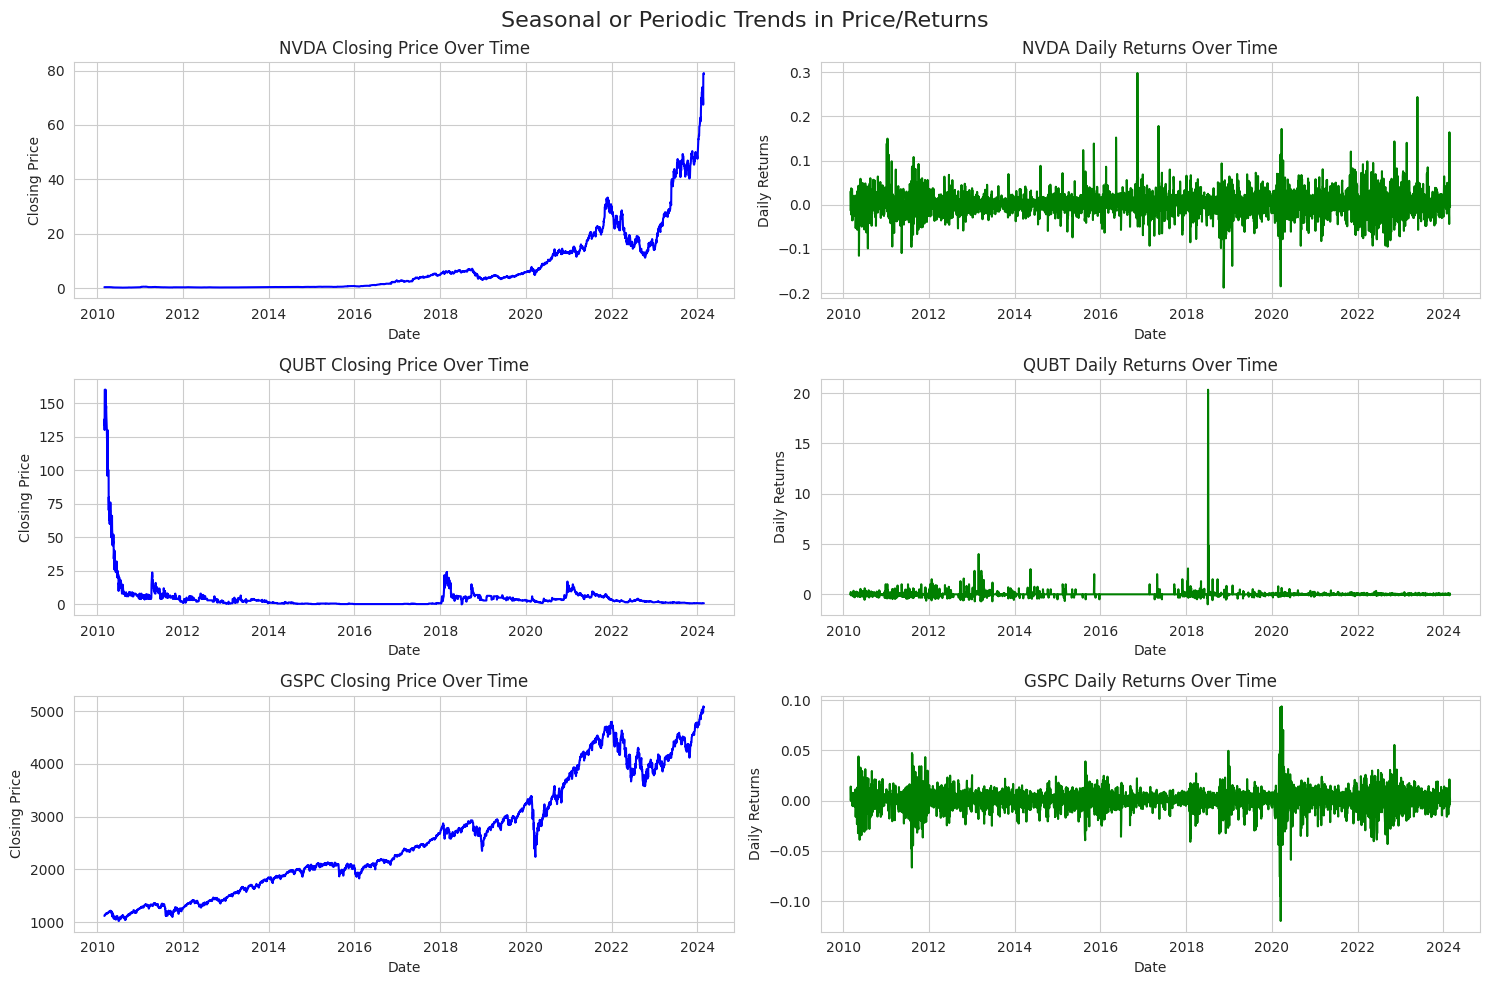

In [48]:
# Assuming nvda_data, qubt_data, gspc_data are your DataFrame
fig, axes = plt.subplots(3, 2, figsize=(15, 10))
fig.suptitle('Seasonal or Periodic Trends in Price/Returns', fontsize=16)

stock_data_list = [(nvda_data, 'NVDA'), (qubt_data, 'QUBT'), (gspc_data, 'GSPC')]

for i, (data, stock_name) in enumerate(stock_data_list):
  #Closing Price Subplot
  axes[i, 0].plot(data['Close'], color='blue')
  axes[i, 0].set_title(f'{stock_name} Closing Price Over Time')
  axes[i, 0].set_xlabel('Date')
  axes[i, 0].set_ylabel('Closing Price')

  #Daily Returns Subplot
  axes[i, 1].plot(data['Returns'], color='green')
  axes[i, 1].set_title(f'{stock_name} Daily Returns Over Time')
  axes[i, 1].set_xlabel('Date')
  axes[i, 1].set_ylabel('Daily Returns')

plt.tight_layout()
plt.show()

Volume Trend and Periodic Spikes: Volume Trend

NVDA - Average Volume: 503729786.77
NVDA - Standard Deviation of Volume: 311607138.10
NVDA - Maximum Volume: 3692928000.00
NVDA - Minimum Volume: 45644000.00
--------------------


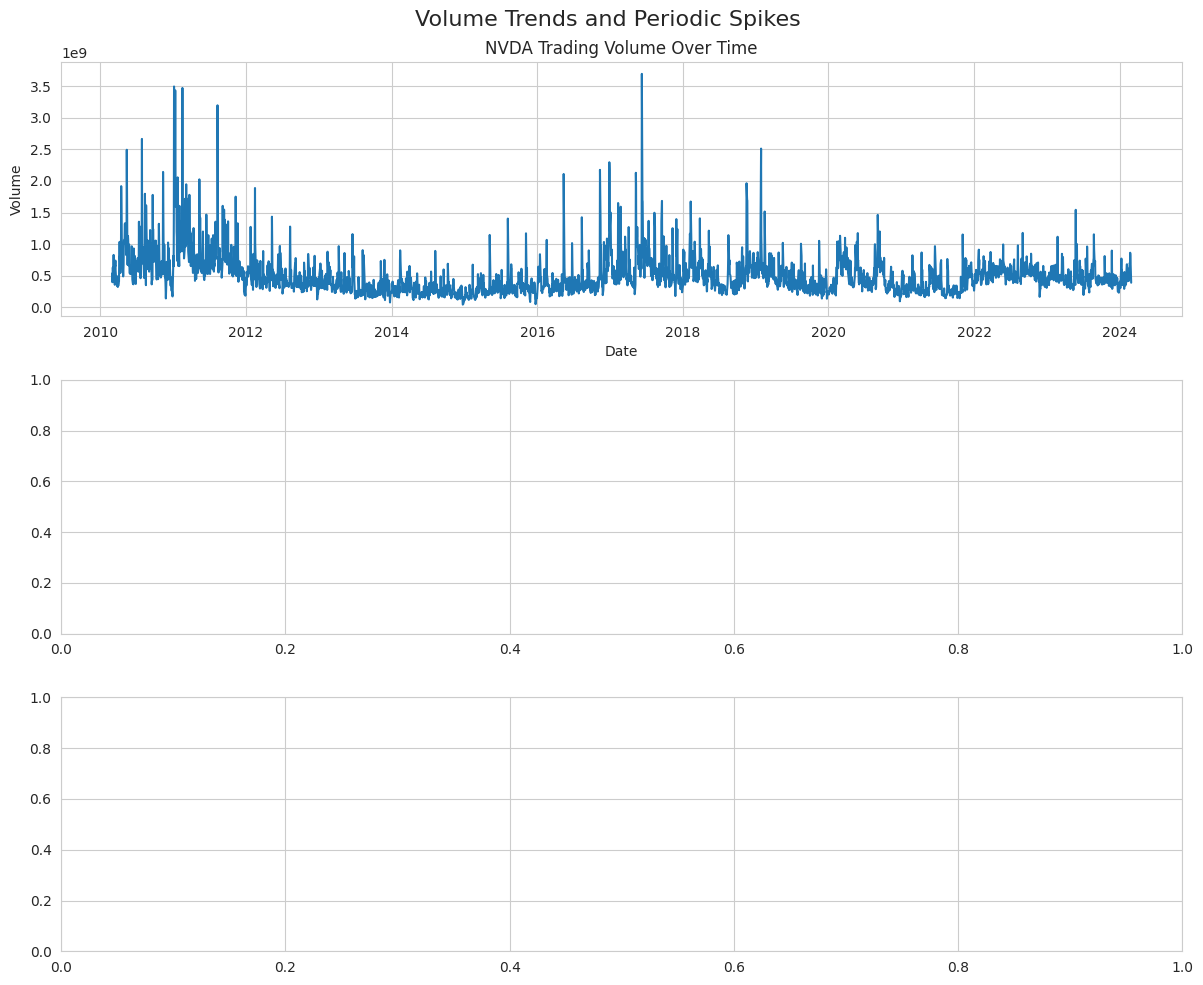

QUBT - Average Volume: 141375.46
QUBT - Standard Deviation of Volume: 944824.13
QUBT - Maximum Volume: 30336200.00
QUBT - Minimum Volume: 0.00
--------------------


<Figure size 640x480 with 0 Axes>

GSPC - Average Volume: 3934058316.30
GSPC - Standard Deviation of Volume: 956492829.57
GSPC - Maximum Volume: 10617810000.00
GSPC - Minimum Volume: 1025000000.00
--------------------


<Figure size 640x480 with 0 Axes>

In [56]:
# Assuming nvda_data, qubt_data, gspc_data are your DataFrame
fig, axes = plt.subplots(3, 1, figsize=(12, 10))
fig.suptitle('Volume Trends and Periodic Spikes', fontsize=16)

stock_data_list = [(nvda_data, 'NVDA'), (qubt_data, 'QUBT'), (gspc_data, 'GSPC')]

for i, (data, stock_name) in enumerate(stock_data_list):
  #Closing Price Subplot
  axes[i].plot(data['Volume'])
  axes[i].set_title(f'{stock_name} Trading Volume Over Time')
  axes[i].set_xlabel('Date')
  axes[i].set_ylabel('Volume')

  # Statistical Analysis
  avg_volume = data['Volume'].mean()
  std_dev_volume = data['Volume'].std()
  max_volume = data['Volume'].max()
  min_volume = data['Volume'].min()

  print(f"{stock_name} - Average Volume: {avg_volume:.2f}")
  print(f"{stock_name} - Standard Deviation of Volume: {std_dev_volume:.2f}")
  print(f"{stock_name} - Maximum Volume: {max_volume:.2f}")
  print(f"{stock_name} - Minimum Volume: {min_volume:.2f}")
  print("-"*20) # Separator

  plt.tight_layout()
  plt.show()


Lagged Relationship

In [58]:
# How strong today's Volume and Return Predict Tomorrow's price?

for data, stock_name in [(nvda_data, 'NVDA'), (qubt_data, 'QUBT'), (gspc_data, 'GSPC')]:
  # Drop rows with missing values for 'Tomorrow'
  data = data.dropna(subset=['Tomorrow'])

  # Calculate correlation between today's volume/Return and Tomorrow's price
  correlation_volume = data['Volume'].corr(data['Tomorrow'])
  correlation_returns = data['Returns'].corr(data['Tomorrow'])

  print(f'{stock_name}:')
  print(f'Correlation between today\'s Volume and Tomorrow\'s Price: {correlation_volume:.2f}')
  print(f'Correlation between todays\'s Returns and Tomorrow\'s Price: {correlation_returns:.2f}')

NVDA:
Correlation between today's Volume and Tomorrow's Price: -0.05
Correlation between todays's Returns and Tomorrow's Price: 0.04
QUBT:
Correlation between today's Volume and Tomorrow's Price: -0.03
Correlation between todays's Returns and Tomorrow's Price: -0.00
GSPC:
Correlation between today's Volume and Tomorrow's Price: 0.16
Correlation between todays's Returns and Tomorrow's Price: 0.01


In [59]:
# Does Stock_Direction exhibit any Correlation over time
for data, stock_name in [(nvda_data, 'NVDA'), (qubt_data, 'QUBT'), (gspc_data, 'GSPC')]:
  # Calculate autocorrelationof 'Stock_Direction'
  autocorrelation_volume = data['Volume'].autocorr()
  autocorrelation_returns = data['Returns'].autocorr()

  print(f'{stock_name}:')
  print(f'Autocorrelation of Volume: {autocorrelation_volume:.2f}')
  print(f'Autocorrelation of Returns: {autocorrelation_returns:.2f}')

NVDA:
Autocorrelation of Volume: 0.69
Autocorrelation of Returns: -0.05
QUBT:
Autocorrelation of Volume: 0.28
Autocorrelation of Returns: -0.01
GSPC:
Autocorrelation of Volume: 0.70
Autocorrelation of Returns: -0.12


In [63]:
# Create figure
fig = go.Figure()

# Add traces for each stock
fig.add_trace(go.Scatter(x=nvda_data.index, y=nvda_data['Close'], name='NVDA', mode='lines'))
fig.add_trace(go.Scatter(x=qubt_data.index, y=qubt_data['Close'], name='QUBT', mode='lines'))
fig.add_trace(go.Scatter(x=gspc_data.index, y=gspc_data['Close'], name='GSPC', mode='lines'))

# Update layout for interactivity
fig.update_layout(title='Price Trends',
                  xaxis_title='Date',
                  yaxis_title='Price',
                  hovermode='x unified',
                  xaxis=dict(rangeslider=dict(visible=True))
)

# Show the plot
fig.show()

In [64]:
# Assuming nvda_data, qubt_data, gspc_data are your DataFrame

# Calulate cumulative returns
nvda_data['Cumulative Returns'] = (1 + nvda_data['Returns']).cumprod() - 1
qubt_data['Cumulative Returns'] = (1 + qubt_data['Returns']).cumprod() - 1
gspc_data['Cumulative Returns'] = (1 + gspc_data['Returns']).cumprod() - 1

# Create the figure
fig = go.Figure()

# Add traces for each stock and the market index
fig.add_trace(go.Scatter(x=nvda_data.index, y=nvda_data['Cumulative Returns'], name='NVDA', mode='lines'))
fig.add_trace(go.Scatter(x=qubt_data.index, y=qubt_data['Cumulative Returns'], name='QUBT', mode='lines'))
fig.add_trace(go.Scatter(x=gspc_data.index, y=gspc_data['Cumulative Returns'], name='GSPC'))

# Update layout for interactivity
fig.update_layout(title='Stock Performance Comparsion',
                  xaxis_title='Date',
                  yaxis_title='Cumulative Return',
)

# Show the plot
fig.show()

In [67]:
# Calculate volatility (standard deviation of daily return)
nvda_volatility = nvda_data['Returns'].std()
qubt_volatility = qubt_data['Returns'].std()
gspc_volatility = gspc_data['Returns'].std()

# Create a bar chart to compare volatility
fig = go.Figure(data=[
    go.Bar(name='NVDA', x=['Volatility'], y=[nvda_volatility]),
    go.Bar(name='QUBT', x=['Volatility'], y=[qubt_volatility]),
    go.Bar(name='GSPC', x=['Volatility'], y=[gspc_volatility])])

# Update layout
fig.update_layout(title='Stock Volatility Comparison: NVDA, QUBT and GSPC',
                  xaxis_title='Stock',
                  yaxis_title='Volatility (Standard Deviation of Daily Returns)'
)

# Show the plot
fig.show()

#Print volatility values
print(f"NVDA Volatility: {nvda_volatility:.4f}")
print(f"QUBT Volatility: {qubt_volatility:.4f}")
print(f"GSPC Volatility: {gspc_volatility:.4f}")

# Determine which stock is less volatility
if nvda_volatility < qubt_volatility:
  less_volatile_stock = 'NVDA'
elif gspc_volatility < nvda_volatility and gspc_volatility < qubt_volatility:
  less_volatile_stock = 'GSPC'
else:
  less_volatile_stock = 'QUBT'

print(f"\n{less_volatile_stock} is less volatility and might be more suitable for risk averse clients")

NVDA Volatility: 0.0284
QUBT Volatility: 0.4080
GSPC Volatility: 0.0110

NVDA is less volatility and might be more suitable for risk averse clients


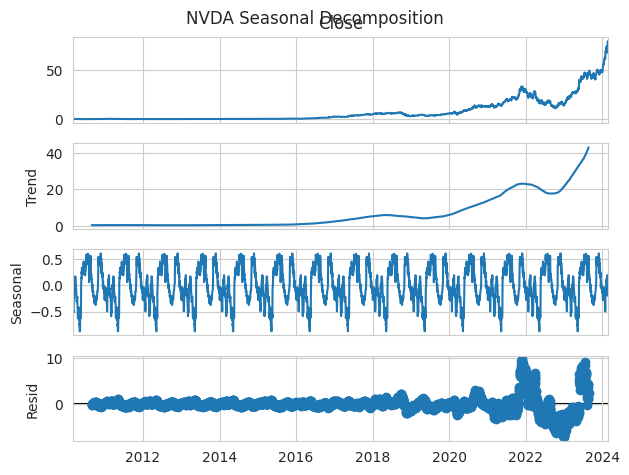

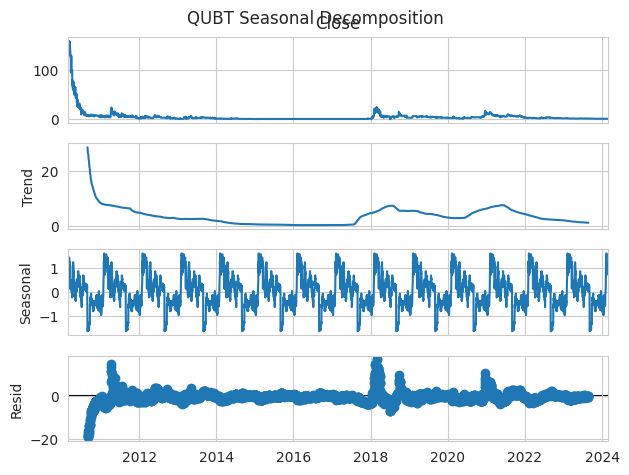

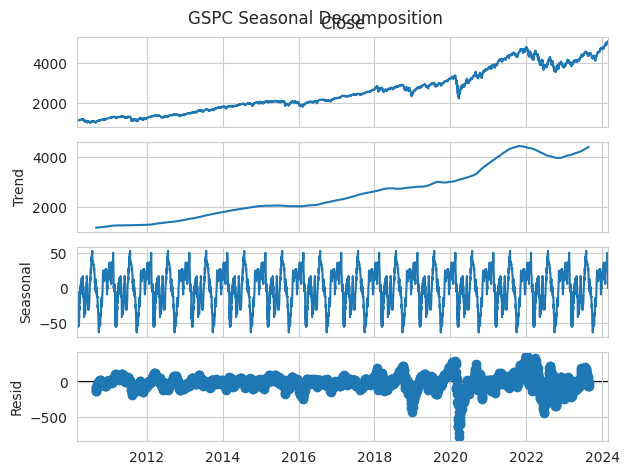

In [68]:
# Seasonal Decomposition:
from statsmodels.tsa.seasonal import seasonal_decompose

for data, stock_name in [(nvda_data, 'NVDA'), (qubt_data, 'QUBT'), (gspc_data, 'GSPC')]:
  results = seasonal_decompose(data['Close'], model='additive', period=252)
  results.plot()
  plt.suptitle(f'{stock_name} Seasonal Decomposition')
  plt.show()


Data Preparation, Modelling and Evaluation:

In [73]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from statsmodels.tsa.arima.model import ARIMA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import tensorflow as tf
from sklearn.metrics import mean_squared_error
from datetime import datetime

In [72]:
pip install tensorflow

In [74]:
# Normalization
scaler = StandardScaler()
scaled_data = scaler.fit_transform(nvda_data)

In [75]:
nvda_data.columns

Index(['Close', 'High', 'Low', 'Open', 'Volume', 'Returns', 'Tomorrow',
       'Stock Direction', '20_days_MA', '50_days_MA', 'Cumulative Returns'],
      dtype='object', name='Price')

In [77]:
# Feature Selection
x = nvda_data[['Open', 'High', 'Low', 'Volume', 'Returns', 'Tomorrow']].fillna(0)
y = nvda_data['Stock Direction']

In [78]:
# Train and Test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
def create_sequences(nvda_data, seq_length):
  """
  Generate sequence and labels for LSTM.

  Args:
    data: The input time series data as a Numpy array.
    seq_length: The length of the input sequences (lookback window).

  Returns:


  Returns:
    sequences: A Num